In [1]:
%matplotlib inline

import os.path

import numpy as np
import pandas as pd
from scipy import stats
from scipy.constants import speed_of_light
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from IPython.display import display

In [2]:
DPI = 240
IMG_DIR = '../img'
def save_fig(fig, name):
    fig.savefig(os.path.join(IMG_DIR, name), dpi=DPI)

In [3]:
data = pd.DataFrame(data={'dphi': [-23.0796, -23.3808, -23.9952, -24.6256, -25.2801, -25.9509, -26.6057, -27.2170, -27.7839],
                          's': [7e-4, 6e-4, 7e-4, 8e-4, 6e-4, 7e-4, 7e-4, 6e-4, 6e-4],
                          'd': [15e-2, 20e-2, 30e-2, 40e-2, 50e-2, 60e-2, 70e-2, 80e-2, 90e-2]})

frequency = 5e6  # 5 MHz
wavelength = speed_of_light / frequency
print(wavelength)

slope_th = -wavelength / 360
intersect_th = data.d.iloc[0] - slope_th * data.dphi.iloc[0]
data['d_th'] = slope_th * data.dphi + intersect_th
data['u_d'] = wavelength * data.s / 360

slope, intersect, r, *_ = stats.linregress(data.dphi, data.d)
data['d_lreg'] = slope * data.dphi + intersect

print(slope_th, slope, slope_th/slope)
display(data)
display(data.u_d / 1e-6)

59.9584916
-0.16655136555555555 -0.15721725719891397 1.0593707619821398


d     dphi       s      d_th       u_d    d_lreg
0  0.15 -23.0796  0.0007  0.150000  0.000117  0.152648
1  0.20 -23.3808  0.0006  0.200165  0.000100  0.200002
2  0.30 -23.9952  0.0007  0.302494  0.000117  0.296596
3  0.40 -24.6256  0.0008  0.407488  0.000133  0.395706
4  0.50 -25.2801  0.0006  0.516496  0.000100  0.498605
5  0.60 -25.9509  0.0007  0.628219  0.000117  0.604066
6  0.70 -26.6057  0.0007  0.737277  0.000117  0.707012
7  0.80 -27.2170  0.0006  0.839090  0.000100  0.803119
8  0.90 -27.7839  0.0006  0.933508  0.000100  0.892245

0    116.585956
1     99.930819
2    116.585956
3    133.241092
4     99.930819
5    116.585956
6    116.585956
7     99.930819
8     99.930819
Name: u_d, dtype: float64

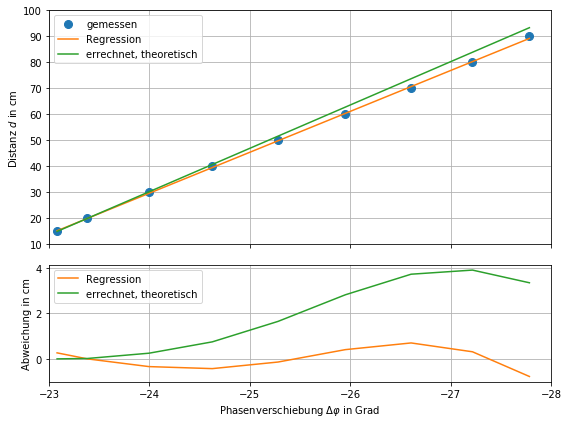

In [4]:
fig = plt.figure(figsize=(8,6))
layout = GridSpec(2, 1, figure=fig, height_ratios=[2,1])

ax1 = fig.add_subplot(layout[1])
ax0 = fig.add_subplot(layout[0], sharex=ax1)


ax0.plot(data.dphi, 100*data.d, marker='o', markersize=8, linestyle='', label="gemessen")
ax0.plot(data.dphi, 100*data.d_lreg, label="Regression")
ax0.plot(data.dphi, 100*data.d_th, label="errechnet, theoretisch")

ax0.grid(True)
ax0.legend()
ax0.set_ylabel("Distanz $d$ in cm")
ax0.set_ylim(10, 100)
plt.setp(ax0.get_xticklabels(), visible=False)


ax1.plot(data.dphi, 100*(data.d_lreg-data.d), color='C1', label="Regression")
ax1.plot(data.dphi, 100*(data.d_th-data.d), color='C2', label="errechnet, theoretisch")

ax1.grid(True)
ax1.legend()
ax1.set_xlabel("Phasenverschiebung $\\Delta\\varphi$ in Grad")
ax1.set_ylabel("Abweichung in cm")
ax1.set_xlim(-23, -28)


fig.tight_layout()
save_fig(fig, '3c-regression')